<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ вакансий из HeadHunter
   

In [4]:
import pandas as pd
import psycopg2

In [5]:
DBNAME = ''
USER = ''
PASSWORD = ''
HOST = ''
PORT = 

In [6]:
connection = psycopg2.connect(
    dbname=DBNAME,
    user=USER,
    host=HOST,
    password=PASSWORD,
    port=PORT
)

# Юнит 3. Предварительный анализ данных

1. Напишите запрос, который посчитает количество вакансий в нашей базе (вакансии находятся в таблице vacancies). 

In [7]:
query_3_1 = f'''select
            count(*) as number_count
            from vacancies
'''

In [8]:
# результат запроса
vacancies_cnt = pd.read_sql_query(query_3_1, connection)
display(vacancies_cnt)

C:\Users\leono\AppData\Local\Temp\ipykernel_23544\1190061692.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  vacancies_cnt = pd.read_sql_query(query_3_1, connection)


,number_count
0,49197


2. Напишите запрос, который посчитает количество работодателей (таблица employers). 

In [9]:
query_3_2 = f'''select
            count(*) as number_count_employers
            from employers
'''

In [10]:
number_count_employers = pd.read_sql_query(query_3_2, connection)
number_count_employers

C:\Users\leono\AppData\Local\Temp\ipykernel_23544\1847637560.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  number_count_employers = pd.read_sql_query(query_3_2, connection)


,number_count_employers
0,23501


3. Посчитате с помощью запроса количество регионов (таблица areas).

In [11]:
query_3_3 = f'''select
            count(*) as number_count_areas
            from areas
'''

In [12]:
# результат запроса
number_count_areas = pd.read_sql_query(query_3_3, connection)
number_count_areas

C:\Users\leono\AppData\Local\Temp\ipykernel_23544\1294921529.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  number_count_areas = pd.read_sql_query(query_3_3, connection)


,number_count_areas
0,1362


4. Посчитате с помощью запроса количество сфер деятельности в базе (таблица industries).

In [13]:
query_3_4 = f'''select
            count(*) as number_count_industries
            from industries 
'''

In [14]:
# результат запроса
number_count_industries = pd.read_sql_query(query_3_4, connection)
number_count_industries

C:\Users\leono\AppData\Local\Temp\ipykernel_23544\1475051750.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  number_count_industries = pd.read_sql_query(query_3_4, connection)


,number_count_industries
0,294


***

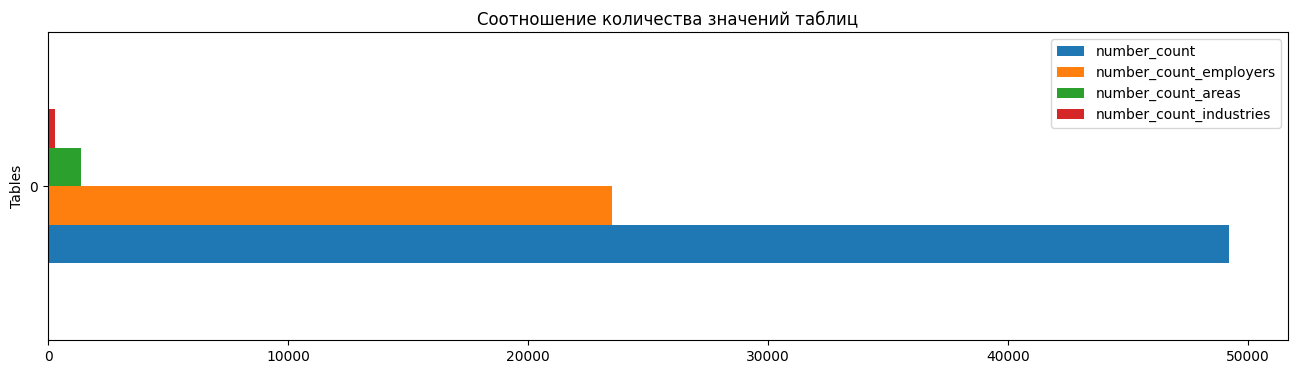

In [15]:
# выводы по предварительному анализу данных
df_cnt = pd.concat((vacancies_cnt, number_count_employers, number_count_areas, number_count_industries), axis=1)
df_cnt.plot(
    kind='barh',
    figsize=(16, 4),
    title='Соотношение количества значений таблиц',
    ylabel='Tables'
);

На графике видно, что количество вакансий около 50 тыс, а работодателей почти в два раза меньше. Это говорит нам о том, что коэффициент пропорциональности работодателей и вакансий равен приблизительно двум. Выборка по городам и по сферам деятельности довольно широкая

# Юнит 4. Детальный анализ вакансий

1. Напишите запрос, который позволит узнать, сколько (cnt) вакансий в каждом регионе (area).
Отсортируйте по количеству вакансий в порядке убывания.

In [16]:
query_4_1 = f'''select
            a.name as area,
            count(*) as cnt
            from areas as a
            join vacancies v on a.id=v.area_id
            group by a.name
            order by cnt desc
            limit 10
'''

In [17]:
# результат запроса
vacancies_count = pd.read_sql_query(query_4_1, connection)
vacancies_count

C:\Users\leono\AppData\Local\Temp\ipykernel_23544\3851789608.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  vacancies_count = pd.read_sql_query(query_4_1, connection)


,area,cnt
0,Москва,5333
1,Санкт-Петербург,2851
2,Минск,2112
3,Новосибирск,2006
4,Алматы,1892
5,Екатеринбург,1698
6,Нижний Новгород,1670
7,Казань,1415
8,Краснодар,1301
9,Самара,1144


2. Напишите запрос, чтобы определить у какого количества вакансий заполнено хотя бы одно из двух полей с зарплатой.

In [18]:
query_4_2 = f'''select
            count(*) as cnt
            from vacancies as v
            where salary_from is not null or salary_to is not null
'''

In [19]:
# результат запроса
salary_count = pd.read_sql_query(query_4_2, connection)
salary_count

C:\Users\leono\AppData\Local\Temp\ipykernel_23544\949394385.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  salary_count = pd.read_sql_query(query_4_2, connection)


,cnt
0,24073


3. Найдите средние значения для нижней и верхней границы зарплатной вилки. Округлите значения до целого.

In [20]:
query_4_3 = f'''select
            avg(salary_from) as avg_salary_from,
            avg(salary_to) as avg_salary_to
            from vacancies as v
'''

In [21]:
# результат запроса
avg_salary_count = pd.read_sql_query(query_4_3, connection)
round(avg_salary_count)

C:\Users\leono\AppData\Local\Temp\ipykernel_23544\907507157.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  avg_salary_count = pd.read_sql_query(query_4_3, connection)


,avg_salary_from,avg_salary_to
0,71065.0,110537.0


4. Напишите запрос, который выведет количество вакансий для каждого сочетания типа рабочего графика (schedule) и типа трудоустройства (employment), используемого в вакансиях. Результат отсортируйте по убыванию количества.


In [22]:
query_4_4 = f'''select
            count(*) as cnt,
            schedule,
            employment
            from vacancies as v
            group by schedule, employment
            order by cnt desc
'''

In [23]:
# результат запроса
schedule_count = pd.read_sql_query(query_4_4, connection)
schedule_count

C:\Users\leono\AppData\Local\Temp\ipykernel_23544\1888370669.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  schedule_count = pd.read_sql_query(query_4_4, connection)


,cnt,schedule,employment
0,35367,Полный день,Полная занятость
1,7802,Удаленная работа,Полная занятость
2,1593,Гибкий график,Полная занятость
3,1312,Удаленная работа,Частичная занятость
4,940,Сменный график,Полная занятость
5,569,Полный день,Стажировка
6,367,Вахтовый метод,Полная занятость
7,347,Полный день,Частичная занятость
8,312,Гибкий график,Частичная занятость
9,141,Полный день,Проектная работа


5. Напишите запрос, выводящий значения поля Требуемый опыт работы (experience) в порядке возрастания количества вакансий, в которых указан данный вариант опыта. 

In [24]:
query_4_5 = f'''select
            count(*) as cnt,
            experience
            from vacancies as v
            group by experience
            order by cnt
'''

In [25]:
# результат запроса
experience_count = pd.read_sql_query(query_4_5, connection)
experience_count

C:\Users\leono\AppData\Local\Temp\ipykernel_23544\1998695830.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  experience_count = pd.read_sql_query(query_4_5, connection)


,cnt,experience
0,1337,Более 6 лет
1,7197,Нет опыта
2,14511,От 3 до 6 лет
3,26152,От 1 года до 3 лет


***

C:\Users\leono\AppData\Local\Temp\ipykernel_23544\3846281229.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  salary = pd.read_sql_query(query_salary, connection)


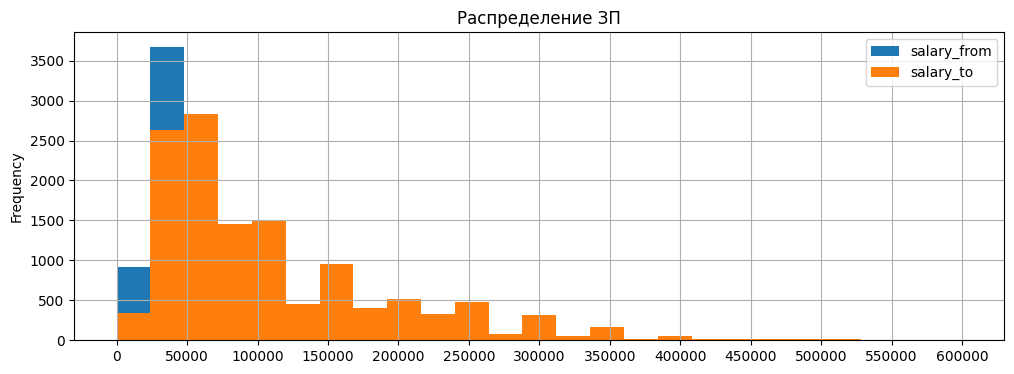

In [26]:
# выводы по детальному анализу вакансий
# Делаем запрос на обозначенную зарплату
query_salary = f''' select salary_from,
                        salary_to
                    from public.vacancies
                    where salary_from is not null
                        or salary_to is not null
                    '''
salary = pd.read_sql_query(query_salary, connection)

# Отсекаем потенциальный выброс верхней границы зарплаты и строим график распределения
salary[salary['salary_to'] < 650000].plot(
    kind='hist',
    figsize=(12, 4),
    bins=25,
    grid = True,
    xticks= range(0, 650000, 50000),
    title='Распределение ЗП'
);

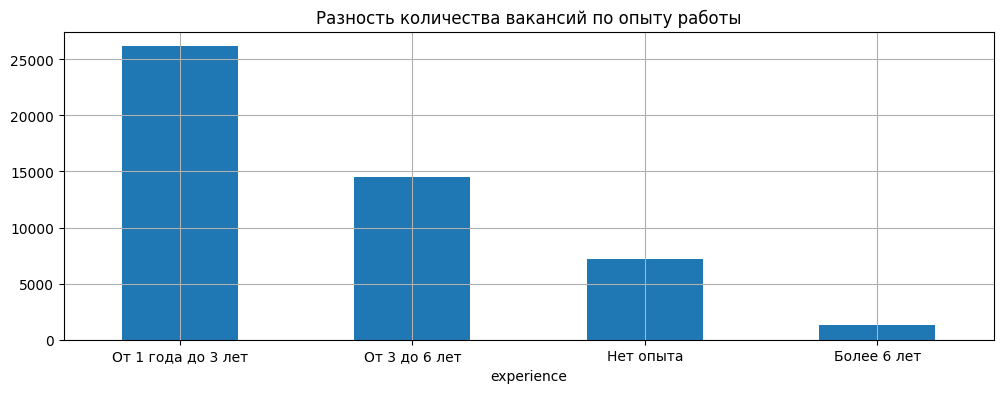

In [27]:
# Группируем данные по опыту, сортируем по большинству в порядке уменьшения.
data = experience_count.groupby(['experience'])['cnt'].last()
data = data.nlargest()

# Строим столбчатую диаграмму для наглядности результата
data.plot(
    kind='bar',
    grid=True,
    figsize=(12, 4),
    rot=0,
    title='Разность количества вакансий по опыту работы'
);

По данным результатом можно составить модальное представление о вакансиях. Основная доля вакансий с указанной зарплатой около 40 тыс. Диапозон варьируется от 30 до 105 тыс. Опыт работы от 1 года до 3 лет. Больше всего объявлений сосредоточено в Москве. Требуется поный день, полная занятность.

# Юнит 5. Анализ работодателей

1. Напишите запрос, который позволит узнать, какие работодатели находятся на первом и пятом месте по количеству вакансий.

In [28]:
query_5_1 = f'''
            select 
                e.name,  
                count(v.id) cnt
            from public.vacancies v
                join public.employers e on v.employer_id=e.id
            group by 1
            order by 2 desc
            limit 10
            '''

In [29]:
# результат запроса
name_count_5 = pd.read_sql_query(query_5_1, connection)
name_count_5

C:\Users\leono\AppData\Local\Temp\ipykernel_23544\3740266247.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  name_count_5 = pd.read_sql_query(query_5_1, connection)


,name,cnt
0,Яндекс,1933
1,Ростелеком,491
2,Тинькофф,444
3,СБЕР,428
4,Газпром нефть,331
5,ИК СИБИНТЕК,327
6,МТС,292
7,DataArt,247
8,Совкомбанк Технологии,204
9,Первый Бит,176


2. Напишите запрос, который для каждого региона выведет количество работодателей и вакансий в нём.
Среди регионов, в которых нет вакансий, найдите тот, в котором наибольшее количество работодателей.


In [30]:
query_5_2 = f'''
            select 
                a.name,  
                count(distinct e.id) as emp_cnt,
                count(distinct v.id) as vcn_cnt
            from public.areas a
                left join public.employers e on e.area=a.id
                left join public.vacancies v on v.area_id=a.id
            where v.id is null
            group by 1
            order by emp_cnt desc
            limit 10
            '''

In [31]:
# результат запроса
emp_cnt = pd.read_sql_query(query_5_2, connection)
emp_cnt

C:\Users\leono\AppData\Local\Temp\ipykernel_23544\3358796221.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  emp_cnt = pd.read_sql_query(query_5_2, connection)


,name,emp_cnt,vcn_cnt
0,Россия,410,0
1,Казахстан,207,0
2,Московская область,75,0
3,Краснодарский край,19,0
4,Беларусь,18,0
5,Ростовская область,18,0
6,Азербайджан,17,0
7,Нижегородская область,16,0
8,Республика Татарстан,16,0
9,Узбекистан,15,0


3. Для каждого работодателя посчитайте количество регионов, в которых он публикует свои вакансии. Отсортируйте результат по убыванию количества.


In [32]:
query_5_3 = f'''
    SELECT
        e.name 
        ,count(distinct v.area_id) as areas_count
    FROM public.employers as e
    LEFT JOIN public.vacancies as v on v.employer_id = e.id
    GROUP by e.name
    ORDER by areas_count desc
    limit 10
    ;
  '''

In [33]:
# результат запроса
areas_count = pd.read_sql_query(query_5_3, connection)
areas_count

C:\Users\leono\AppData\Local\Temp\ipykernel_23544\4268678489.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  areas_count = pd.read_sql_query(query_5_3, connection)


,name,areas_count
0,Яндекс,181
1,Ростелеком,152
2,Спецремонт,116
3,Поляков Денис Иванович,88
4,ООО ЕФИН,71
5,Совкомбанк,63
6,МТС,55
7,"ЭФКО, Управляющая компания",49
8,Почта России,48
9,КРОН,48


4. Напишите запрос для подсчёта количества работодателей, у которых не указана сфера деятельности. 

In [34]:
query_5_4 = f'''
    SELECT
        count(e.id) as cnt 
    FROM public.employers as e
    LEFT JOIN public.employers_industries as ei on ei.employer_id = e.id
    where ei.employer_id is null
    limit 10
    ;
  '''

In [35]:
# результат запроса
employers_industries = pd.read_sql_query(query_5_4, connection)
employers_industries

C:\Users\leono\AppData\Local\Temp\ipykernel_23544\463544847.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  employers_industries = pd.read_sql_query(query_5_4, connection)


,cnt
0,8419


5. Напишите запрос, чтобы узнать название компании, находящейся на третьем месте в алфавитном списке (по названию) компаний, у которых указано четыре сферы деятельности. 

In [36]:
query_5_5 = f'''
    SELECT
    e.name,
    count(distinct ei.industry_id) as cnt
    FROM public.employers as e
    LEFT JOIN public.employers_industries as ei on ei.employer_id = e.id
    WHERE ei.employer_id is not null
    GROUP by e.name
    HAVING count(distinct ei.industry_id) = 4
    ORDER by e.name asc
    LIMIT 1
    OFFSET 2
    ;
  '''

In [37]:
# результат запроса
employers_industries_1 = pd.read_sql_query(query_5_5, connection)
employers_industries_1

C:\Users\leono\AppData\Local\Temp\ipykernel_23544\495753362.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  employers_industries_1 = pd.read_sql_query(query_5_5, connection)


,name,cnt
0,2ГИС,4


6. С помощью запроса выясните, у какого количества работодателей в качестве сферы деятельности указана Разработка программного обеспечения.


In [38]:
query_5_6 = f'''
    SELECT
    count(distinct e.id) as cnt
    FROM public.employers_industries as ei
    join employers as e on ei.employer_id=e.id
    join industries as i on ei.industry_id = i.id
    where i.name = 'Разработка программного обеспечения'
    ;
  '''

In [39]:
# результат запроса
employers_industries_2 = pd.read_sql_query(query_5_6, connection)
employers_industries_2

C:\Users\leono\AppData\Local\Temp\ipykernel_23544\1305930552.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  employers_industries_2 = pd.read_sql_query(query_5_6, connection)


,cnt
0,3553


7. Для компании «Яндекс» выведите список регионов-миллионников, в которых представлены вакансии компании, вместе с количеством вакансий в этих регионах. Также добавьте строку Total с общим количеством вакансий компании. Результат отсортируйте по возрастанию количества.

Список городов-милионников надо взять [отсюда](https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8). 

Если возникнут трудности с этим задание посмотрите материалы модуля  PYTHON-17. Как получать данные из веб-источников и API. 

In [40]:
# код для получения списка городов-милионников:
# Т.к. город Воронеж в таблице в Википедии представлен с окончанием [а], требуется убрать лишнее окончание.
# В дальнейм полученный список город выводим в виде кортежа.
url = 'https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8' 
df_html = pd.read_html(url) 
df_cities = df_html[1] 
df_cities['Город']=df_cities['Город'].apply(lambda x: x.replace('[a]',''))
cities = df_cities['Город'].to_list()
cit=tuple(cities)
cit

('Москва',
 'Санкт-Петербург',
 'Новосибирск',
 'Екатеринбург',
 'Казань',
 'Красноярск',
 'Нижний Новгород',
 'Челябинск',
 'Уфа',
 'Самара',
 'Ростов-на-Дону',
 'Краснодар',
 'Омск',
 'Воронеж',
 'Пермь',
 'Волгоград')

In [41]:
# потребуется соединить вакансии с работадателями и регионами и довавить условие по наименованию компании
# и городам миллионникам, указанным в кортеже cit

query_5_7 = f'''select 
                    a.name city,
                    count(v.id) cnt               -- считаем вакансии по городам
                from vacancies v join employers e on v.employer_id=e.id
                                 join areas a on v.area_id=a.id 
                where e.name = 'Яндекс' and a.name in {cit} 
                group by 1                                 -- для упрощения используем позиционную группировку

                union all                                  -- объединяем таблицы по строкам
                
                select
                    'Total', count(v.id)
                from vacancies v join employers e on v.employer_id=e.id
                                join areas a on v.area_id=a.id 
                where e.name in ('Яндекс') 
                and a.name in {cit} 
                
                order by 2
            '''

In [42]:
# результат запроса
cities = pd.read_sql_query(query_5_7, connection)
cities

C:\Users\leono\AppData\Local\Temp\ipykernel_23544\460680008.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  cities = pd.read_sql_query(query_5_7, connection)


,city,cnt
0,Омск,21
1,Челябинск,22
2,Красноярск,23
3,Волгоград,24
4,Пермь,25
5,Казань,25
6,Ростов-на-Дону,25
7,Уфа,26
8,Самара,26
9,Краснодар,30


***

C:\Users\leono\AppData\Local\Temp\ipykernel_23544\1198235874.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query_5_1, connection)


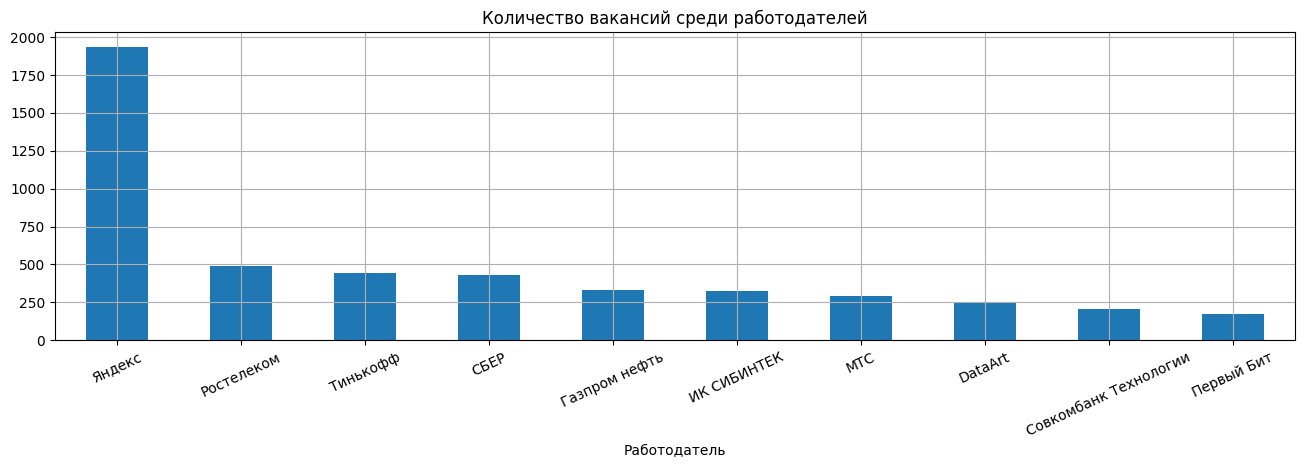

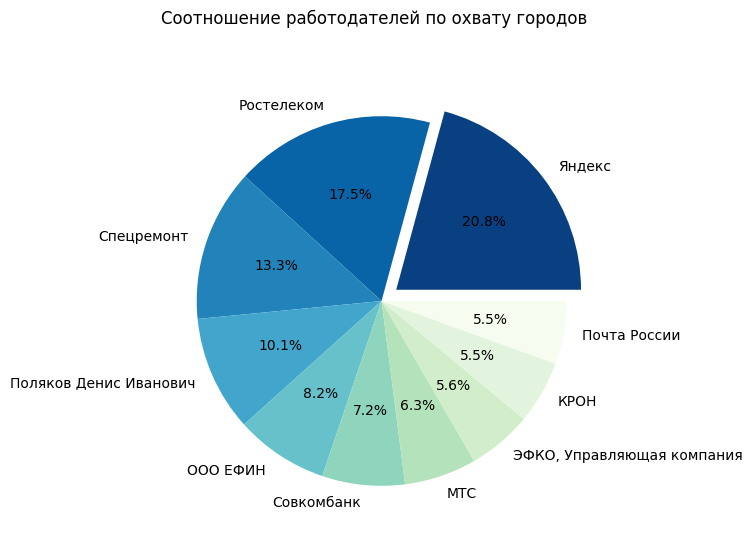

In [43]:
# выводы по анализу работодателей
# Выводим таблицу из запроса 5.1
df = pd.read_sql_query(query_5_1, connection)

# Группируем данные по имени работодателей, сортируем и сохраняем первые 10 позиций.
data1 = df.groupby('name').last()
data1 = data1['cnt'].nlargest(10)

# Строим столбчатую диаграмму
data1.plot(
    kind='bar',
    grid=True,
    rot=25,
    figsize=(16, 4),
    xlabel='Работодатель',
    title='Количество вакансий среди работодателей'
);

# Группируем данные по компаниям, сортируем и выводим первые 10 позиций.
data2 = areas_count.groupby('name').last().sort_values('areas_count', ascending=False)[:10]

# Строим круговой график соотношения работодателей по охвату городов.
data2.plot(
    kind='pie',
    figsize=(6,6),
    labels=data2.index,
    autopct = '%.1f%%',
    explode=[0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    subplots=True,
    legend=False,
    ylabel='',
    colormap='GnBu_r',
    title='Соотношение работодателей по охвату городов'
);

По результатам анализа работодателей Яндекс занимает лидирующую позицию по колличеству вакансий и охвату городов. Основная доля работодателей располагается в Москве. Второй город по количеству работодателей - Санкт-Питербург. Самая востребованная сфера деятельности - Разработка программного обеспечения.

# Юнит 6. Предметный анализ

1. Сколько вакансий имеет отношение к данным?

Считаем, что вакансия имеет отношение к данным, если в её названии содержатся слова 'data' или 'данн'.

*Подсказка: Обратите внимание, что названия вакансий могут быть написаны в любом регистре.* 


In [44]:
query_6_1 = f'''
            select
                count(v.id) ds_vacancies
            from public.vacancies v
where (lower(v.name) like '%data%' 
        or lower(v.name) like '%данн%')
            '''

In [45]:
# результат запроса
ds_vacancies = pd.read_sql_query(query_6_1, connection)
ds_vacancies

C:\Users\leono\AppData\Local\Temp\ipykernel_23544\1937916000.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  ds_vacancies = pd.read_sql_query(query_6_1, connection)


,ds_vacancies
0,1771


2. Сколько есть подходящих вакансий для начинающего дата-сайентиста? 
Будем считать вакансиями для дата-сайентистов такие, в названии которых есть хотя бы одно из следующих сочетаний:
* 'data scientist'
* 'data science'
* 'исследователь данных'
* 'ML' (здесь не нужно брать вакансии по HTML)
* 'machine learning'
* 'машинн%обучен%'

** В следующих заданиях мы продолжим работать с вакансиями по этому условию.*

Считаем вакансиями для специалистов уровня Junior следующие:
* в названии есть слово 'junior' *или*
* требуемый опыт — Нет опыта *или*
* тип трудоустройства — Стажировка.
 

In [46]:
query_6_2 = f'''
            select 
                count(id) junior_vacancies
            from public.vacancies 
where (lower(name) like '%data scientist%' or 
        lower(name) like '%data science%' or
            lower(name) like '%исследователь данных%' or
                ((name) like '%ML%' and (name) not like '%HTML%') or
                    lower(name) like '%machine learning%' or
                        lower(name) like '%машинн%обучен%')  
                            
            and
            (lower(name) like '%junior%' or
                lower(experience) like '%нет опыта%' or
                    lower(employment) like '%стажировка%')
            '''

In [53]:
# результат запроса
jun_vacancies = pd.read_sql_query(query_6_2, connection)
jun_vacancies

C:\Users\leono\AppData\Local\Temp\ipykernel_23544\2311562088.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  jun_vacancies = pd.read_sql_query(query_6_2, connection)


,junior_vacancies
0,51


3. Сколько есть вакансий для DS, в которых в качестве ключевого навыка указан SQL или postgres?

** Критерии для отнесения вакансии к DS указаны в предыдущем задании.*

In [54]:
query_6_3 = f'''
            select 
                count(id) sql_skills
            from public.vacancies 
where (lower(name) like '%data scientist%' or 
        lower(name) like '%data science%' or
            lower(name) like '%исследователь данных%' or
                (name like '%ML%' and name not like '%HTML%') or
                    lower(name) like '%machine learning%' or
                        lower(name) like '%машинн%обучен%') 
            and
            (lower(key_skills) like '%sql%' or 
                lower(key_skills) like '%postgres%')
            '''

In [55]:
# результат запроса
sql_vacancies = pd.read_sql_query(query_6_3, connection)
sql_vacancies

C:\Users\leono\AppData\Local\Temp\ipykernel_23544\3698489625.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  sql_vacancies = pd.read_sql_query(query_6_3, connection)


,sql_skills
0,201


4. Проверьте, насколько популярен Python в требованиях работодателей к DS.Для этого вычислите количество вакансий, в которых в качестве ключевого навыка указан Python.

** Это можно сделать помощью запроса, аналогичного предыдущему.*

In [56]:
query_6_4 = f'''
            select 
                count(id) python_skills
            from public.vacancies 
where (lower(name) like '%data scientist%' or 
        lower(name) like '%data science%' or
            lower(name) like '%исследователь данных%' or
                (name like '%ML%' and name not like '%HTML%') or
                    lower(name) like '%machine learning%' or
                        lower(name) like '%машинн%обучен%') 
            and (lower(key_skills) like '%python%')
            '''

In [57]:
# результат запроса
python_skills = pd.read_sql_query(query_6_4, connection)
python_skills

C:\Users\leono\AppData\Local\Temp\ipykernel_23544\950132531.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  python_skills = pd.read_sql_query(query_6_4, connection)


,python_skills
0,351


5. Сколько ключевых навыков в среднем указывают в вакансиях для DS?
Ответ округлите до двух знаков после точки-разделителя.

In [58]:
query_6_5 = f'''
            select
                ROUND(AVG(LENGTH(key_skills) - LENGTH(REPLACE(key_skills, CHR(9), ''))+1), 2) avg_ds_skills
            from public.vacancies 
where (lower(name) LIKE '%data scientist%' OR 
    lower(name) LIKE '%data science%' OR
        lower(name) LIKE '%исследователь данных%' OR
            (name LIKE '%ML%' AND name NOT LIKE '%HTML%') OR
                lower(name) LIKE '%machine learning%' OR
                    lower(name) LIKE '%машинн%обучен%')
	        and (key_skills IS NOT NULL)
           '''

In [59]:
# результат запроса
avg_ds_skills = pd.read_sql_query(query_6_5, connection)
avg_ds_skills

C:\Users\leono\AppData\Local\Temp\ipykernel_23544\1109382575.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  avg_ds_skills = pd.read_sql_query(query_6_5, connection)


,avg_ds_skills
0,6.41


6. Напишите запрос, позволяющий вычислить, какую зарплату для DS в **среднем** указывают для каждого типа требуемого опыта (уникальное значение из поля *experience*). 

При решении задачи примите во внимание следующее:
1. Рассматриваем только вакансии, у которых заполнено хотя бы одно из двух полей с зарплатой.
2. Если заполнены оба поля с зарплатой, то считаем зарплату по каждой вакансии как сумму двух полей, делённую на 2. Если заполнено только одно из полей, то его и считаем зарплатой по вакансии.
3. Если в расчётах участвует null, в результате он тоже даст null (посмотрите, что возвращает запрос select 1 + null). Чтобы избежать этой ситуацию, мы воспользуемся функцией [coalesce](https://postgrespro.ru/docs/postgresql/9.5/functions-conditional#functions-coalesce-nvl-ifnull), которая заменит null на значение, которое мы передадим. Например, посмотрите, что возвращает запрос `select 1 + coalesce(null, 0)`

Выясните, на какую зарплату в среднем может рассчитывать дата-сайентист с опытом работы от 3 до 6 лет. Результат округлите до целого числа. 

In [60]:
query_6_6 = f'''
          select
            experience,
            ROUND(AVG(COALESCE((salary_to + salary_from)/2, salary_from, salary_to))) avg_salary
          from public.vacancies 
          where (lower(name) LIKE '%data scientist%' OR 
                lower(name) LIKE '%data science%' OR
                    lower(name) LIKE '%исследователь данных%' OR
                        (name LIKE '%ML%' AND name NOT LIKE '%HTML%') OR
                           lower(name) LIKE '%machine learning%' OR
                                lower(name) LIKE '%машинн%обучен%')
               
          AND (salary_from IS NOT NULL OR salary_to IS NOT NULL)
          AND (experience IS NOT NULL)
          GROUP BY 1
           '''


In [61]:
# результат запроса
avg_salary = pd.read_sql_query(query_6_6, connection)
avg_salary

C:\Users\leono\AppData\Local\Temp\ipykernel_23544\4147299713.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  avg_salary = pd.read_sql_query(query_6_6, connection)


,experience,avg_salary
0,Нет опыта,74643.0
1,От 1 года до 3 лет,139675.0
2,От 3 до 6 лет,243115.0


***

3.6


C:\Users\leono\AppData\Local\Temp\ipykernel_23544\3582581194.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(round(ds_vacancies.iloc[0][0] / vacancies_cnt.iloc[0][0]*100, 2))


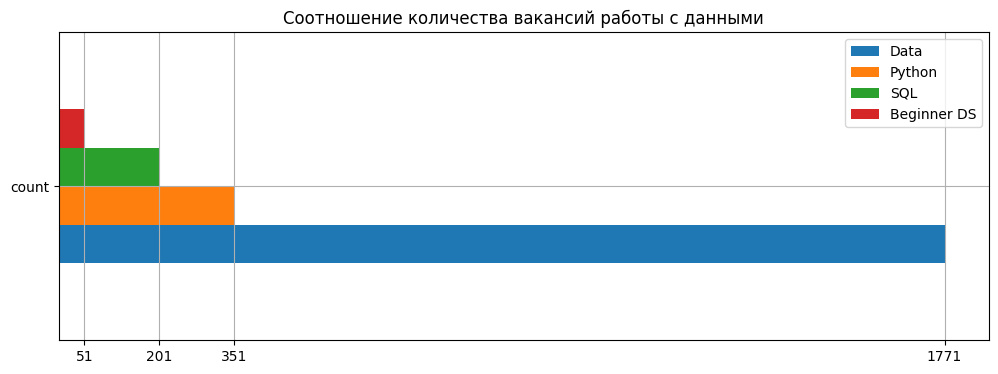

In [62]:
# выводы по предметному анализу
# Выводим долю вакансий с данными от общего количества вакансий в процентах
print(round(ds_vacancies.iloc[0][0] / vacancies_cnt.iloc[0][0]*100, 2))

# Объединяем выводы по количеству вакансий требующие работу с данными, начинающего специалиста Data-Science, навык SQL и Python
data = pd.concat([ds_vacancies, jun_vacancies, sql_vacancies, python_skills], axis=1)
data.columns = ('Data', 'Beginner DS', 'SQL', 'Python')
data.index = ['count']

# Сортируем значения по убыванию
data = data.sort_values(by='count', axis=1, ascending=False)

# Строим диаграмму соотношения
data.plot(
    kind='barh',
    figsize=(12, 4),
    grid=True,
    xticks=data.iloc[0][:],
    title='Соотношение количества вакансий работы с данными'
);

Доля вакансий специализирующихся на данных составляет почти 3.6 процента. Ключевого навыка владения Python требуется больше, чем навыка владения SQL. Вакансий для начинающих дата-саейнтистов немного, 51. Требование различных навыков в выборке вакансий по профессии Data-Science в среднем больше 6-ти.

Это показывает, что большая часть вакансий с требованием навыков, как минимум Puthon\SQL, нуждается в продвинутых специалистах. Так же, по этой профессии в среднем, мы видим высокие зарплаты для стран СНГ. С опытом работы от 3 до 6 лет - ~240 тыс. С опытом работы от 1 до 3 лет выше ста тысяч - в средннем, почти, 140 тыс.

# Общий вывод по проекту

Посмотрим на самые популярные вакансии в IT в предоставленных данных. Направление DS не так популярно, т.к.ранее нами было выявлено всего 480 вакансий. Отбор будем с учетом возможных повторений при этом выберем первые пять и добавим к ним для сравнения наши отобраные вакансии для DS.

In [63]:
query_7_1 = f'''(select
                   name,
                   count(id) cnt
              from vacancies 
              group by 1
              order by  cnt desc
              limit 5)
              
              union all
              
              (select
                    'Вакансиии для DS',
                    count(distinct id)
                from vacancies 
                where (lower(name) like '%data scientist%'
                       or lower(name) like '%data science%'
                       or lower(name) like '%исследователь данных%'
                       or lower(name) like '%machine learning%'
                       or (name like '%ML%' and name not like '%HTML%')
                       or lower(name) like '%машинн%обучен%'))
            '''
df_7_1 = pd.read_sql_query(query_7_1, connection)
df_7_1

C:\Users\leono\AppData\Local\Temp\ipykernel_23544\406979804.py:22: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_7_1 = pd.read_sql_query(query_7_1, connection)


,name,cnt
0,Системный администратор,1761
1,Программист 1С,1153
2,Бизнес-аналитик,488
3,Специалист технической поддержки,457
4,Системный аналитик,432
5,Вакансиии для DS,480


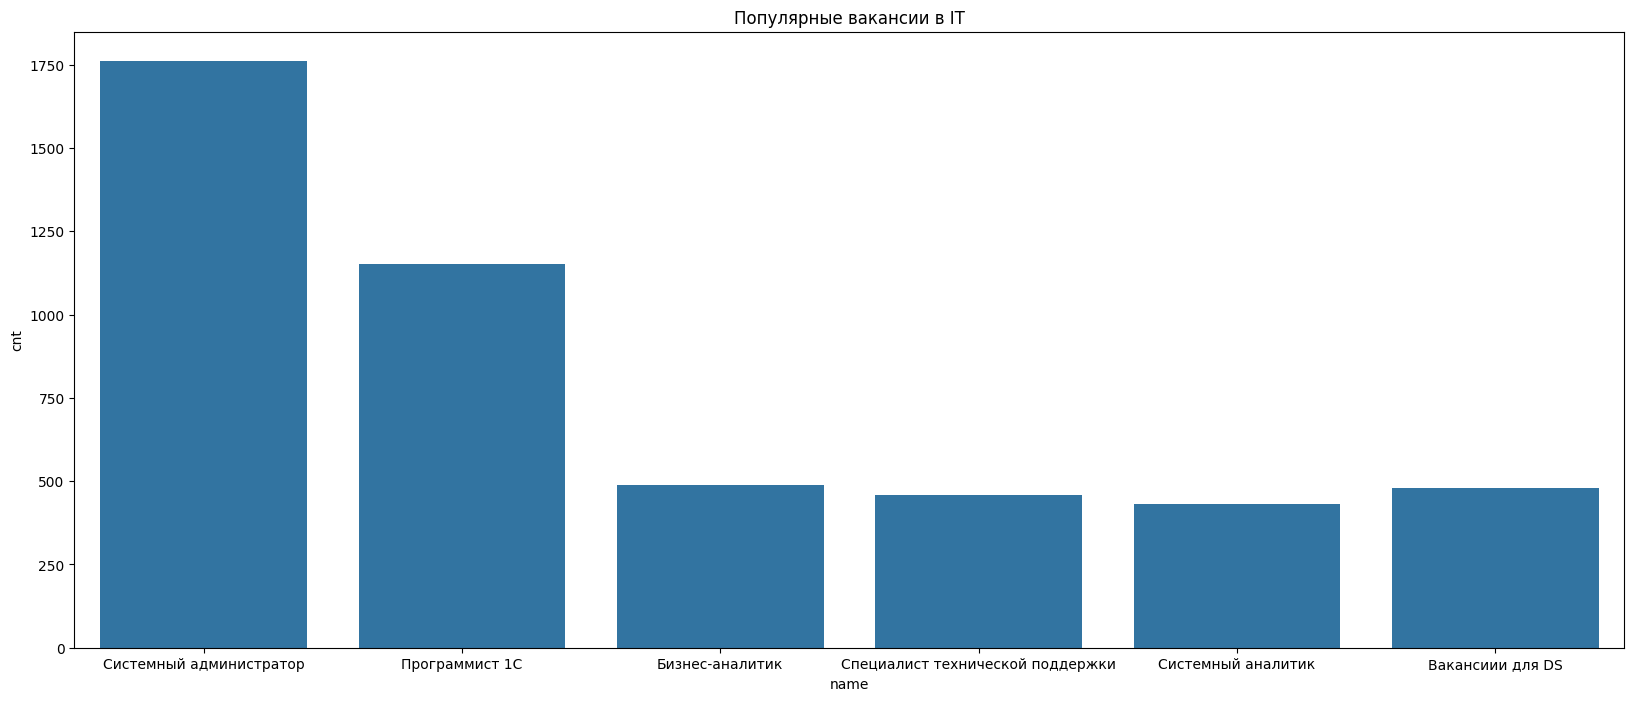

In [64]:
# Для наглядности построим столбчатую диаграмму для выбранных вакансий:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(20, 8))
barplot = sns.barplot(
    data=df_7_1,
    x='name',
    y='cnt',

)
barplot.set_title('Популярные вакансии в IT');

Из общего списка лидер по вакансиям - системный администратор, число вакансий в 4 раза больше пятой вакансии в списке (системный аналитик) и в 3,5 раза больше всех вакансий для DS. Пользуются спросом програмисты 1С-второе место. Данные весьма приближенные, т.к. мы не делали укрупнения по направлениям профессий как для DS, возможно втречаются повторения, как с программистами 1С (если смотреть первые 10 позиций, то программсты 1С появятся еще на 8 месте), но в любом случае можно сделать вывод, что направление DS не самое популярное в сфере IT, хотя и достаточно высоко оплачиваемо.

Теперь посмотрим на средние заработные платы для первых пяти популярных вакансий, для которых эти заработные платы объявлены:

In [65]:
query_7_2 = f'''select
                  v.name,
                  round(avg((coalesce(v.salary_from, v.salary_to)+coalesce(v.salary_to, v.salary_from))/2)) average_salary,
                  count(v.id) cnt
                from vacancies v join areas a on v.area_id=a.id
                where (salary_from  is not null or salary_to is not null) 
                group by v.name
                order by cnt desc
                limit 5'''

df_7_2 = pd.read_sql_query(query_7_2, connection)
df_7_2

C:\Users\leono\AppData\Local\Temp\ipykernel_23544\793180862.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_7_2 = pd.read_sql_query(query_7_2, connection)


,name,average_salary,cnt
0,Системный администратор,50115.0,1287
1,Программист 1С,110189.0,729
2,Специалист технической поддержки,43211.0,335
3,Инженер-программист,50478.0,279
4,Программист 1C,96906.0,228


И посмотрим на уровень средних зарплат для пяти популярных вакансий в городах миллионниках:

In [66]:
query_7_3 = f'''select
                  v.name,
                  round(avg((coalesce(v.salary_from, v.salary_to)+coalesce(v.salary_to, v.salary_from))/2)) average_salary,
                  count(v.id) cnt
                from vacancies v join areas a on v.area_id=a.id
                where (salary_from  is not null or salary_to is not null)
                      and a.name in {cit}
                group by v.name
                order by cnt desc
                limit 5'''
df_7_3 = pd.read_sql_query(query_7_3, connection)
df_7_3

C:\Users\leono\AppData\Local\Temp\ipykernel_23544\761600256.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_7_3 = pd.read_sql_query(query_7_3, connection)


,name,average_salary,cnt
0,Системный администратор,55279.0,443
1,Программист 1С,117681.0,289
2,Специалист технической поддержки,47474.0,156
3,Бизнес-аналитик,106504.0,101
4,Аналитик,74970.0,97


In [67]:
# для Москвы пятерка популярных вакансий выглятит так:
query_7_4 = f'''select
                  v.name,
                  round(avg((coalesce(v.salary_from, v.salary_to)+coalesce(v.salary_to, v.salary_from))/2)) average_salary,
                  count(v.id) cnt
                from vacancies v join areas a on v.area_id=a.id
                where (salary_from  is not null or salary_to is not null)
                      and a.name in ('Москва')
                group by v.name
                order by cnt desc
                limit 5'''
df_7_4 = pd.read_sql_query(query_7_4, connection)
df_7_4

C:\Users\leono\AppData\Local\Temp\ipykernel_23544\2726059486.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_7_4 = pd.read_sql_query(query_7_4, connection)


,name,average_salary,cnt
0,Бизнес-аналитик,135827.0,40
1,Системный администратор,97618.0,38
2,Аналитик,101973.0,23
3,Специалист технической поддержки,76993.0,21
4,Системный аналитик,201281.0,16


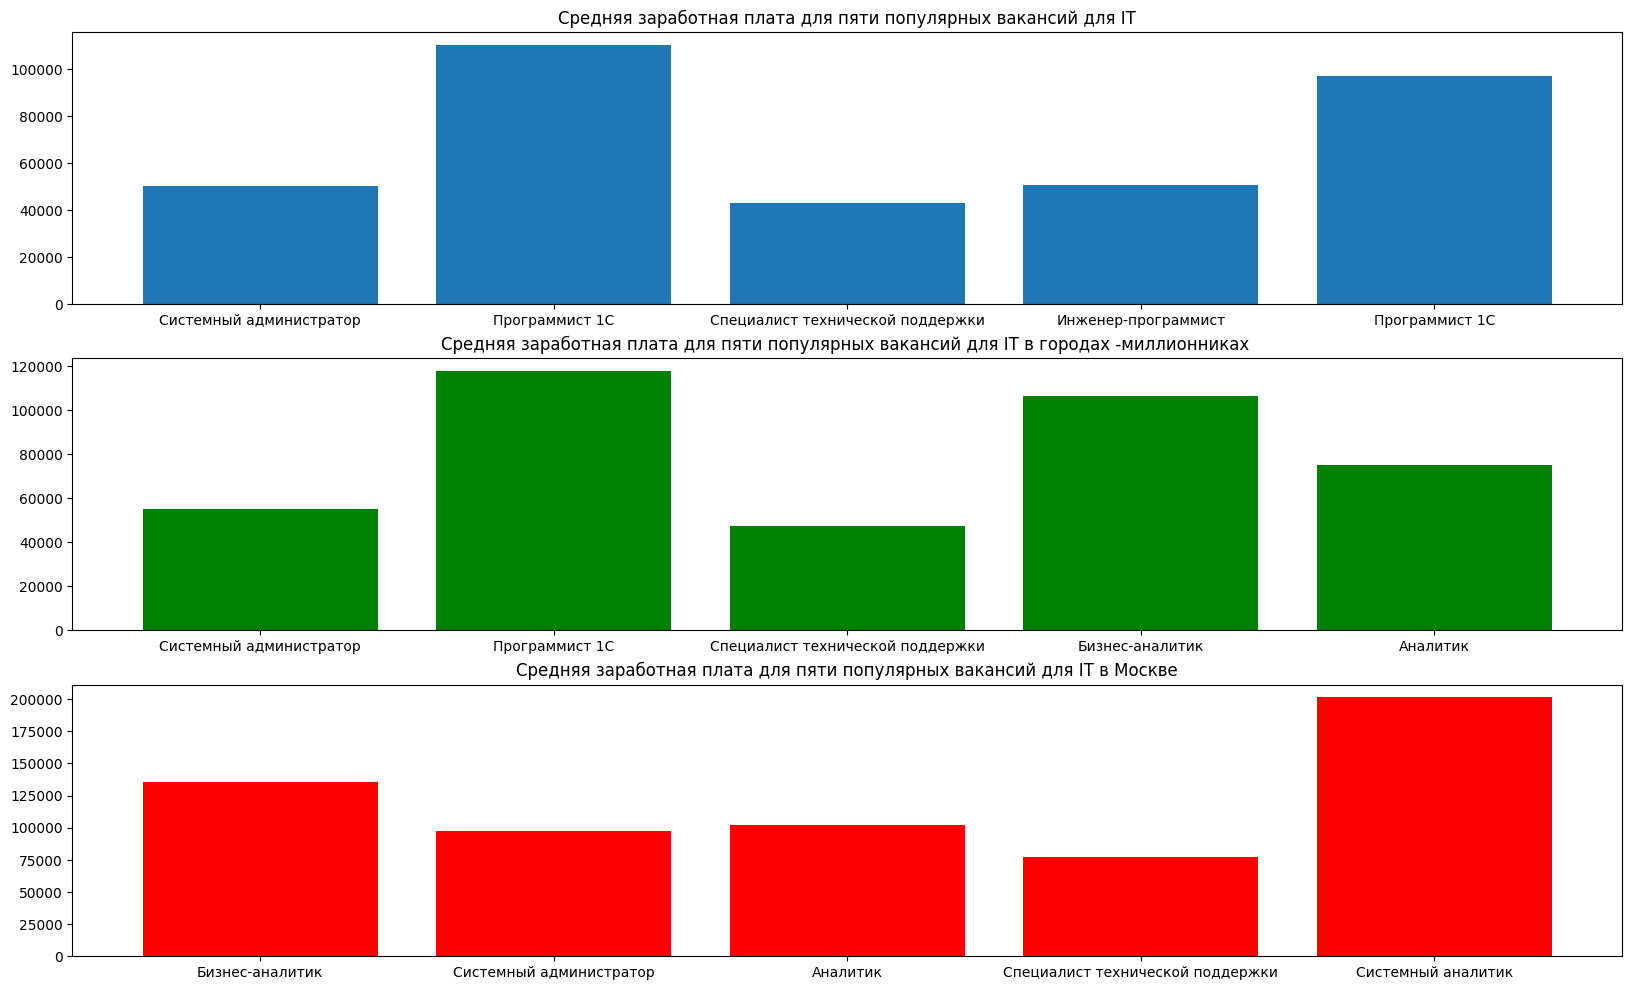

In [68]:
# построим диаграммы лдля наших таблиц:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(20, 12))

axes[0].bar(x=df_7_2.name, 
            height=df_7_2.average_salary,
            label='Заработная плата')
axes[0].set_title('Средняя заработная плата для пяти популярных вакансий для IT')
axes[0].xaxis.set_tick_params(rotation=0)


axes[1].bar(x=df_7_3.name, 
            height=df_7_3.average_salary,
            label='Заработная плата', color='green')
axes[1].set_title('Средняя заработная плата для пяти популярных вакансий для IT в городах -миллионниках ')
axes[1].xaxis.set_tick_params(rotation=0)

axes[2].bar(x=df_7_4.name, 
            height=df_7_4.average_salary,
            label='Заработная плата', color='red')
axes[2].set_title('Средняя заработная плата для пяти популярных вакансий для IT в Москве')
axes[2].xaxis.set_tick_params(rotation=0)

В первой диаграмме нам встретился дважды программист 1С, причем надо отметить, что уровень зарплаты для них достаточно высок по сравнению с остальными (почти в 2 раза выше, по сравнению с остальными вакансиями). Это говорит о востребованности данного направления или изначально язык 1С не слишком популярен, из-за чего специалистов на рынке не так много.

Если сравнивать пятерку популярных вакансий в городах-миллиониках с общей таблицей, то первые три популярные вакансии совпадают, причем зарплаты примерно на том же уровне и самый высокооплачиваемый- это программист 1С.Само количество вакансий отличается: в первой таблице почти в 2,5 раза больше по всем пяти позициям, чем во второй.

По Москве пятерка популярных вакансий с озвученными зарплатами отличается от двух предыдущих таблиц. Во-первых, количество вакансий на порядок меньше, причем если смотреть количество популярных вакансий в столице для первой позиции (бизнес-аналитик) без условий по зарплате их количество увеличится до 173 (больше в 4 раза). Во-вторых, уровень заработных плат в Москве выше, чем в других регионах. Например, специалист технической поддержки (4 место) или системный администратор (2 место) могут рассчитывать на доход почти в 2 раза превышающий в среднем по регионам. Самые востребованные и высокооплачиваемые специалисты- это бизнес-аналитики, по зарплате их опережают только системные аналитики (средний уровень предлагаемого дохода от 200 тыс. руб.), но количество вакансий не велико по сравнению с первой позицией.

Все выше перечисленное говорит о привлекательности Москвы как места работы для IT-специалиста, особенно если его профессиональный уровень достаточно высок.

Это небольшое исследование показывает, как много информации еще не проанализировано. Можно исследовать какие навыки требуются самым высокооплачиваемым и востребованным профессиям или проанализировать работодателей по видам вакансий в разных регионах, например, по Яндексу или Ростелекому. Но для начала следует укрупнить вакансии по направлениям, чтобы не встречались повторения, как с программистами 1С.

### Подведем итог исследования, обобщим выводы по исследованию:
Общее количество вакансий в сфере IT достаточно велико, почти 50 тыс. представлено для исследования.  
Только 64% из общего числа работодателей разместили свои объявления в исследуемых данных.  
Есть крупные работодатели, которые размещают по несколько вакансий более, чем в 100 разных регионах (безусловный лидер - Яндекс).    
Самые популярные места для работы -столичные города: Москва и Санкт-Петербург.  
Значительное большинство работодателей предлагают полную занятость и полный рабочий день. Большинству работодателей (больше 50% от всех вакансий) требуются специалисты с опытом работы от одного до трех лет.  
Только в половине представленных вакансий встречаются предложения по заработной плате, причем чем выше должность , тем меньше информации.  
Направление DS - не самое популярное, но достаточно высокооплачиваемое, даже для специалистов с минимальным опытом работы. Одними из ключевых навыков для специалиста в DS является знание языка Python и SQL.

In [69]:
connection.close()